## Import Package

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## Load & Prepare Dataset

### Download IMDB Reviews Dataset in Plain Text (Word)

In [ ]:
imdb_reviews_word_ds = tfds.load("imdb_reviews", as_supervised=True)
imdb_reviews_word_ds_training = list(imdb_reviews_word_ds["train"])
imdb_reviews_word_ds_validation = list(imdb_reviews_word_ds["test"])

### => Prepare Training & Validation Dataset

In [3]:
x_train_word_ds = []
y_train_word_ds = []

for text, label in imdb_reviews_word_ds_training:
    
    x_train_word_ds.append(text.numpy().decode("utf-8"))
    y_train_word_ds.append(label.numpy())
    

x_validation_word_ds = []
y_validation_word_ds = []

for text, label in imdb_reviews_word_ds_validation:
    
    x_validation_word_ds.append(text.numpy().decode("utf-8"))
    y_validation_word_ds.append(label.numpy())

### => Tokenize Plain Text

In [4]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=12000, oov_token="<OOV>")

In [5]:
tokenizer.fit_on_texts(texts=x_train_word_ds)

In [ ]:
tokenizer.word_index

In [7]:
x_train_word_ds = tokenizer.texts_to_sequences(texts=x_train_word_ds)
x_validation_word_ds = tokenizer.texts_to_sequences(texts=x_validation_word_ds)

### => Pad the Sequences

In [8]:
x_train_word_ds = keras.preprocessing.sequence.pad_sequences(sequences=x_train_word_ds,
                                                             maxlen=128,
                                                             padding="post",
                                                             truncating="post")

x_validation_word_ds = keras.preprocessing.sequence.pad_sequences(sequences=x_validation_word_ds,
                                                                  maxlen=128,
                                                                  padding="post",
                                                                  truncating="post")

### => Have a Look on Prepared Dataset

In [9]:
# word dataset for training
temp_dict = {"Text (Word)": list(x_train_word_ds),
             "Label (int)": y_train_word_ds}

pd.DataFrame.from_dict(temp_dict)

,Text (Word),Label (int)
0,"[12, 14, 33, 425, 392, 18, 90, 28, 10554, 9, 3...",0
1,"[11, 26, 75, 571, 6, 805, 2354, 313, 106, 19, ...",0
2,"[4383, 6109, 2, 1, 4802, 3976, 9, 4, 895, 1595...",0
3,"[12, 7, 2, 241, 5, 20, 16, 4, 8776, 2707, 2653...",1
4,"[15, 406, 26, 1044, 30, 2, 370, 13, 138, 2513,...",1
...,...,...
24995,"[11, 26, 4, 4369, 437, 17, 12, 121, 448, 163, ...",0
24996,"[2, 289, 7, 8753, 1, 3006, 9644, 258, 75, 4, 6...",1
24997,"[861, 36, 11, 41, 186, 143, 157, 11, 378, 59, ...",0
24998,"[52, 11, 217, 12, 1468, 21, 246, 11, 14, 768, ...",0


In [10]:
# word dataset for validation
temp_dict = {"Text (Word)": list(x_validation_word_ds),
             "Label (int)": y_validation_word_ds}

pd.DataFrame.from_dict(temp_dict)

,Text (Word),Label (int)
0,"[48, 24, 106, 13, 95, 4066, 16, 740, 5065, 10,...",1
1,"[4, 1, 696, 784, 5, 4, 178, 1, 2326, 1, 8758, ...",1
2,"[627, 18, 298, 468, 1709, 18, 1305, 18, 909, 2...",0
3,"[337, 4407, 1, 495, 252, 6, 6266, 47, 1, 6, 12...",0
4,"[15, 4, 1138, 1, 1470, 11, 508, 12, 20, 53, 74...",1
...,...,...
24995,"[545, 1, 7, 22, 64, 4, 1316, 18, 19, 196, 129,...",0
24996,"[12, 7, 207, 823, 29, 5, 59, 1639, 187, 106, 1...",1
24997,"[89, 1, 18, 205, 124, 108, 574, 355, 11, 233, ...",0
24998,"[43, 616, 49, 11, 871, 37, 10, 8954, 1981, 3, ...",1


### => Covert Prepared Dataset to Numpy Array

In [11]:
x_train_word_ds = np.array(x_train_word_ds)
y_train_word_ds = np.array(y_train_word_ds)
print("Type of word dataset for training (Text): ", type(x_train_word_ds))
print("Type of word dataset for training (Label): ", type(y_train_word_ds))

print()

x_validation_word_ds = np.array(x_validation_word_ds)
y_validation_word_ds = np.array(y_validation_word_ds)
print("Type of word dataset for validation (Text): ", type(x_validation_word_ds))
print("Type of word dataset for validation (Label): ", type(y_validation_word_ds))

Type of word dataset for training (Text):  <class 'numpy.ndarray'>
Type of word dataset for training (Label):  <class 'numpy.ndarray'>

Type of word dataset for validation (Text):  <class 'numpy.ndarray'>
Type of word dataset for validation (Label):  <class 'numpy.ndarray'>


### => Shape of Training & Validation Dataset

In [12]:
print("Shape of word dataset for training (Text): ", x_train_word_ds.shape)
print("Shape of word dataset for training (Label): ", y_train_word_ds.shape)
print("Shape of word dataset for validation (Text): ", x_validation_word_ds.shape)
print("Shape of word dataset for validation (Label): ", y_validation_word_ds.shape)

Shape of word dataset for training (Text):  (25000, 128)
Shape of word dataset for training (Label):  (25000,)
Shape of word dataset for validation (Text):  (25000, 128)
Shape of word dataset for validation (Label):  (25000,)


### Download IMDB Reviews Dataset in Subword

In [ ]:
imdb_reviews_subword_ds, info = tfds.load("imdb_reviews/subwords8k", as_supervised=True, with_info=True)
imdb_reviews_subword_ds_training = list(imdb_reviews_subword_ds["train"])
imdb_reviews_subword_ds_validation = list(imdb_reviews_subword_ds["test"])

### => Prepare Training & Validation Dataset

In [14]:
x_train_subword_ds = []
y_train_subword_ds = []

for text, label in imdb_reviews_subword_ds_training:
    
    x_train_subword_ds.append(text.numpy())
    y_train_subword_ds.append(label.numpy())
    

x_validation_subword_ds = []
y_validation_subword_ds = []

for text, label in imdb_reviews_subword_ds_validation:
    
    x_validation_subword_ds.append(text.numpy())
    y_validation_subword_ds.append(label.numpy())

### => Pad the Sequences

In [15]:
x_train_subword_ds = keras.preprocessing.sequence.pad_sequences(sequences=x_train_subword_ds,
                                                                maxlen=200,
                                                                padding="post",
                                                                truncating="post")

x_validation_subword_ds = keras.preprocessing.sequence.pad_sequences(sequences=x_validation_subword_ds,
                                                                     maxlen=200,
                                                                     padding="post",
                                                                     truncating="post")

### => Have a Look on Prepared Dataset

In [16]:
# subword dataset for training
temp_dict = {"Text (Subword)": list(x_train_subword_ds),
             "Label (int)": y_train_subword_ds}

pd.DataFrame.from_dict(temp_dict)

,Text (Subword),Label (int)
0,"[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 3...",0
1,"[12, 31, 93, 867, 7, 1256, 6585, 7961, 421, 36...",0
2,"[636, 102, 4714, 8, 1, 4333, 4, 4135, 47, 1325...",0
3,"[62, 9, 1, 312, 6, 32, 23, 4, 7809, 47, 7513, ...",1
4,"[249, 929, 31, 2699, 104, 2, 51, 1, 707, 13, 1...",1
...,...,...
24995,"[12, 31, 4, 6598, 7961, 760, 22, 14, 355, 2, 6...",0
24996,"[19, 570, 9, 2498, 7981, 3, 3293, 3011, 254, 3...",1
24997,"[4344, 3, 392, 12, 56, 245, 576, 3, 4027, 12, ...",0
24998,"[324, 12, 284, 14, 5530, 25, 371, 12, 18, 3038...",0


In [17]:
# subword dataset for validation
temp_dict = {"Text (Subword)": list(x_validation_subword_ds),
             "Label (int)": y_validation_subword_ds}

pd.DataFrame.from_dict(temp_dict)

,Text (Subword),Label (int)
0,"[173, 29, 185, 13, 115, 1956, 8044, 3, 398, 12...",1
1,"[133, 2237, 64, 1229, 1795, 6, 4, 615, 7974, 1...",1
2,"[3567, 47, 3634, 7978, 7974, 7981, 2, 7998, 58...",0
3,"[7128, 127, 2196, 2185, 1098, 1040, 687, 1145,...",0
4,"[249, 4, 2256, 3293, 453, 3483, 7961, 5014, 12...",1
...,...,...
24995,"[1628, 2305, 154, 2534, 3011, 914, 4, 9, 33, 8...",0
24996,"[62, 203, 2, 273, 4221, 2, 45, 6, 82, 4370, 29...",1
24997,"[1375, 4546, 1996, 352, 27, 8002, 7968, 123, 1...",0
24998,"[135, 7968, 8, 984, 71, 12, 1974, 48, 39, 3, 1...",1


### => Covert Prepared Dataset to Numpy Array

In [18]:
x_train_subword_ds = np.array(x_train_subword_ds)
y_train_subword_ds = np.array(y_train_subword_ds)
print("Type of subword dataset for training (Text): ", type(x_train_subword_ds))
print("Type of subword dataset for training (Label): ", type(y_train_subword_ds))

print()

x_validation_subword_ds = np.array(x_validation_subword_ds)
y_validation_subword_ds = np.array(y_validation_subword_ds)
print("Type of subword dataset for validation (Text): ", type(x_validation_subword_ds))
print("Type of subword dataset for validation (Label): ", type(y_validation_subword_ds))

Type of subword dataset for training (Text):  <class 'numpy.ndarray'>
Type of subword dataset for training (Label):  <class 'numpy.ndarray'>

Type of subword dataset for validation (Text):  <class 'numpy.ndarray'>
Type of subword dataset for validation (Label):  <class 'numpy.ndarray'>


### => Shape of Training & Validation Dataset

In [19]:
print("Shape of subword dataset for training (Text): ", x_train_subword_ds.shape)
print("Shape of subword dataset for training (Label): ", y_train_subword_ds.shape)
print("Shape of subword dataset for validation (Text): ", x_validation_subword_ds.shape)
print("Shape of subword dataset for validation (Label): ", y_validation_subword_ds.shape)

Shape of subword dataset for training (Text):  (25000, 200)
Shape of subword dataset for training (Label):  (25000,)
Shape of subword dataset for validation (Text):  (25000, 200)
Shape of subword dataset for validation (Label):  (25000,)


## Define Model

### Model for Word Dataset

### => Architecture

In [20]:
model_word = keras.models.Sequential()
model_word.add(keras.layers.Embedding(input_dim=12000, output_dim=32, input_length=128))
model_word.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)))
model_word.add(keras.layers.Bidirectional(keras.layers.LSTM(units=64)))
model_word.add(keras.layers.Dense(units=16, activation="relu"))
model_word.add(keras.layers.Dense(units=1, activation="sigmoid"))

In [21]:
model_word.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 128, 32)           384000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128, 256)          164864    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 715,297
Trainable params: 715,297
Non-trainable params: 0
_________________________________________________________________


### => Compilation

In [22]:
model_word.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["acc"])

### => Callback

In [23]:
class CustomCallback(keras.callbacks.Callback):
    
    def on_epoch_end(self, epochs, logs):
        if logs["acc"] >= 0.99:
            self.model.stop_training = True

my_callback = CustomCallback()

### Model for Subword Dataset

### => Architecture

In [24]:
model_subword = keras.models.Sequential()
model_subword.add(keras.layers.Embedding(input_dim=info.features["text"].encoder.vocab_size, output_dim=32, input_length=200))
model_subword.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128, return_sequences=True)))
model_subword.add(keras.layers.Bidirectional(keras.layers.LSTM(units=64)))
model_subword.add(keras.layers.Dense(units=16, activation="relu"))
model_subword.add(keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
model_subword.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           261920    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 256)          164864    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 593,217
Trainable params: 593,217
Non-trainable params: 0
_________________________________________________________________


### => Compilation

In [26]:
model_subword.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["acc"])

### => Callback

In [27]:
pass

## Train Model

### Train Model for Word Dataset

In [28]:
history_word = model_word.fit(x=x_train_word_ds,
               y=y_train_word_ds,
               batch_size=32,
               epochs=50,
               callbacks=my_callback,
               validation_data=(x_validation_word_ds, y_validation_word_ds))

Epoch 1/50
782/782 [==============================] - 33s 42ms/step - loss: 0.5357 - acc: 0.7063 - val_loss: 0.4060 - val_acc: 0.8161
Epoch 2/50
782/782 [==============================] - 32s 41ms/step - loss: 0.3189 - acc: 0.8659 - val_loss: 0.3876 - val_acc: 0.8284
Epoch 3/50
782/782 [==============================] - 32s 41ms/step - loss: 0.2487 - acc: 0.9034 - val_loss: 0.3915 - val_acc: 0.8280
Epoch 4/50
782/782 [==============================] - 32s 42ms/step - loss: 0.1989 - acc: 0.9266 - val_loss: 0.4131 - val_acc: 0.8219
Epoch 5/50
782/782 [==============================] - 32s 41ms/step - loss: 0.1659 - acc: 0.9436 - val_loss: 0.4648 - val_acc: 0.8070
Epoch 6/50
782/782 [==============================] - 32s 41ms/step - loss: 0.1395 - acc: 0.9542 - val_loss: 0.5626 - val_acc: 0.8040
Epoch 7/50
782/782 [==============================] - 31s 40ms/step - loss: 0.1141 - acc: 0.9641 - val_loss: 0.5452 - val_acc: 0.8108
Epoch 8/50
782/782 [==============================] - 32s 40ms

### Train Model for Subword Dataset

In [29]:
histroy_subword = model_subword.fit(x=x_train_subword_ds,
                                    y=y_train_subword_ds,
                                    batch_size=32,
                                    epochs=50,
                                    callbacks=my_callback,
                                    validation_data=(x_validation_subword_ds, y_validation_subword_ds))

Epoch 1/50
782/782 [==============================] - 43s 56ms/step - loss: 0.5868 - acc: 0.6549 - val_loss: 0.4424 - val_acc: 0.7990
Epoch 2/50
782/782 [==============================] - 42s 53ms/step - loss: 0.3519 - acc: 0.8537 - val_loss: 0.4242 - val_acc: 0.8105
Epoch 3/50
782/782 [==============================] - 42s 54ms/step - loss: 0.2792 - acc: 0.8906 - val_loss: 0.4037 - val_acc: 0.8197
Epoch 4/50
782/782 [==============================] - 43s 55ms/step - loss: 0.2400 - acc: 0.9092 - val_loss: 0.4382 - val_acc: 0.8226
Epoch 5/50
782/782 [==============================] - 41s 52ms/step - loss: 0.2147 - acc: 0.9213 - val_loss: 0.4686 - val_acc: 0.8190
Epoch 6/50
782/782 [==============================] - 42s 54ms/step - loss: 0.1895 - acc: 0.9332 - val_loss: 0.5233 - val_acc: 0.8141
Epoch 7/50
782/782 [==============================] - 42s 54ms/step - loss: 0.1686 - acc: 0.9443 - val_loss: 0.5142 - val_acc: 0.8126
Epoch 8/50
782/782 [==============================] - 42s 53ms

## Check the Training History => Overfitting

### Word Model

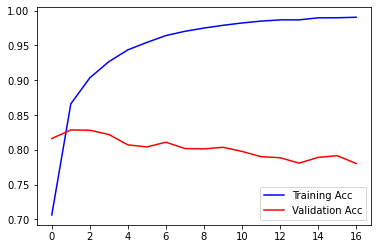

In [30]:
training_acc = history_word.history["acc"]
validation_acc = history_word.history["val_acc"]
epochs = list(range(len(validation_acc)))

plt.plot(epochs, training_acc, color="blue", label="Training Acc")
plt.plot(epochs, validation_acc, color="red", label="Validation Acc")
plt.legend()
plt.show()

### Subword Model

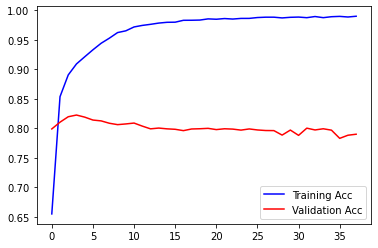

In [31]:
training_acc = histroy_subword.history["acc"]
validation_acc = histroy_subword.history["val_acc"]
epochs = list(range(len(validation_acc)))

plt.plot(epochs, training_acc, color="blue", label="Training Acc")
plt.plot(epochs, validation_acc, color="red", label="Validation Acc")
plt.legend()
plt.show()